# Listing all triggers using SQL statement

To list all triggers along with their associated tables in the current database, you can use the `information_schema.triggers` system view.

For example, the following statement retrieves the triggers with their associated tables in the current database from the `information_schema.triggers` view:

```postgresql
SELECT
  event_object_table AS table_name,
  trigger_name
FROM
  information_schema.triggers
GROUP BY
  table_name,
  trigger_name
ORDER BY
  table_name,
  trigger_name; 
```

Sample output:

```
table_name |         trigger_name
------------+-------------------------------
 employees  | after_delete_employee_trigger
 members    | after_insert_member_trigger
 products   | before_delete_product_trigger
 salaries   | after_update_salary_trigger
(4 rows) 
```

If you want to list all triggers associated with a specific table, you can filter the `event_object_table` column by specifying the table name in the `WHERE` clause.

For example, the following query lists all triggers associated with the `employees` table in the current database:

```postgresql
SELECT
  event_object_table AS table_name,
  trigger_name
FROM
  information_schema.triggers
WHERE
  event_object_table = 'employees'
GROUP BY
  table_name,
  trigger_name
ORDER BY
  table_name,
  trigger_name; 
```

Output:

```postgresql
table_name |         trigger_name
------------+-------------------------------
 employees  | after_delete_employee_trigger
(1 row)
```

To make it more convenient, you can create a user-defined function that wraps the above query.

For example, the following creates a function named `get_triggers()` that returns all triggers with their associated tables in the current database:

```postgresql
create or replace function get_triggers()
returns table (
	table_name text,
	trigger_name text
)
language plpgsql
as
$$
begin
	return query select
	  trg.event_object_table::text AS table_name,
	  trg.trigger_name::text
	from
	  information_schema.triggers trg
	group by
	  table_name,
	  trg.trigger_name
	order by
	  table_name,
	  trg.trigger_name;
end;
$$; 
```

The following statement shows how to call the `get_triggers()` function:

```postgresql
SELECT * FROM get_triggers(); 
```

The following creates a function `get_triggers()` that accepts a table name and returns all the triggers of the table:

```postgresql
create or replace function get_triggers(
	p_table_name text
)
returns table (
	table_name text,
	trigger_name text
)
language plpgsql
as
$$
begin
	return query select
	  event_object_table::text AS table_name,
	  trg.trigger_name::text
	from
	  information_schema.triggers trg
	where
	   event_object_table = p_table_name
	group by
	  table_name,
	  trg.trigger_name
	order by
	  table_name,
	  trg.trigger_name;
end;
$$; 
```

The following statement uses the `get_triggers(text)` function to retrieve all triggers of the `employees` table:

```postgresql
SELECT * FROM get_triggers('employees'); 
```

# Listing all triggers using the pg_trigger view

The `pg_trigger` is a system view that provides information about triggers defined in the database. 

Here are some important columns:

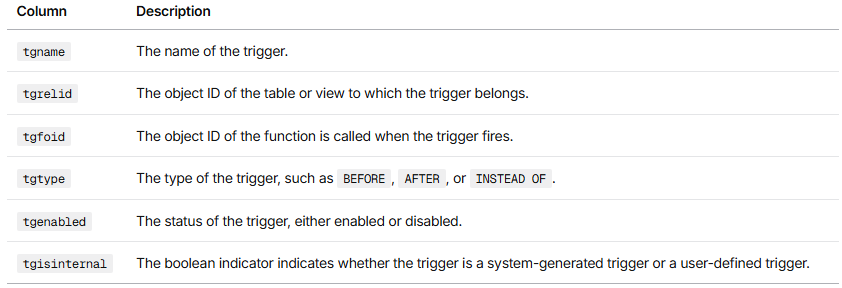

For example, the following statement retrieves all user-defined triggers of the `employees` table from the `pg_trigger` view:

```postgresql
SELECT
  tgname AS trigger_name
FROM
  pg_trigger
WHERE
  tgrelid = 'employees' :: regclass
  AND tgisinternal = false
ORDER BY
  trigger_name; 
```

Output:

```postgresql
trigger_name
-------------------------------
 after_delete_employee_trigger
(1 row)
```